<a href="https://colab.research.google.com/github/LeQuangHieuVKU/DeepLearning_AudioClassification/blob/main/AudioClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Import and install dependence**


* 1.1 Install dependence


In [ ]:
!pip install tensorflow tensorflow-io matplotlib

1.2 Load Dependence


In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.12/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl7strings13safe_strtou64ESt17basic_string_viewIcSt11char_traitsIcEEPm']
  warnings.warn(

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2.Build data loading function**
#2.1 Define Paths to File

In [ ]:
CAPUCHIN_FILE = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Capuchinbird_Clips','XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Capuchinbird_Clips/XC3776-3.wav'

In [ ]:
NOT_CAPUCHIN_FILE

'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

#**2.2 Build DataLoading Fuction**

In [ ]:

def load_wav_16k_mono(filename):
  #Đọc toàn bộ file audio dưới dạng binary
    file_contents = tf.io.read_file(filename)
    #Giải mã file .wav thành wav và sample_rate
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    #Bỏ các chiều dư thừa
    wav = tf.squeeze(wav, axis=-1)
    return wav


In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [ ]:
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [ ]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [ ]:
len(wav)

132300

2.3 Flot wave



In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

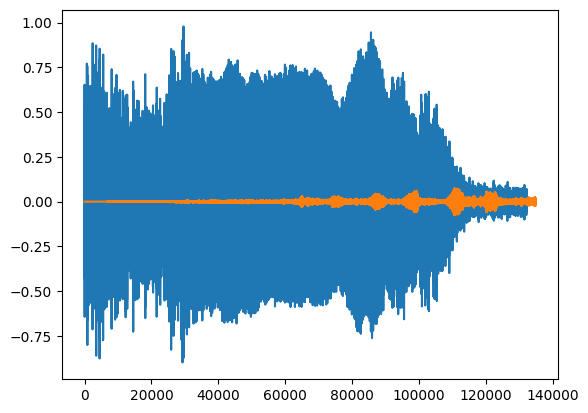

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

#**3.Create TensorFlow Dataset**
#3.1 Define Paths to Positive and Negative Data

In [ ]:
POS = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Capuchinbird_Clips')
NEG = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Not_Capuchinbird_Clips')


In [ ]:
POS

'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Capuchinbird_Clips'

In [ ]:
NEG

'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Not_Capuchinbird_Clips'

3.2 Create Tensorflow DataSets

In [ ]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [ ]:
pos.as_numpy_iterator().next()

b'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Capuchinbird_Clips/XC387509-5.wav'

In [ ]:
len(pos)

217

In [ ]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

3.3 Add labels and Combine Positive and Negitive Samples

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/Colab Notebooks/Audio Classifier/data/Parsed_Capuchinbird_Clips/XC388470-6.wav',
 np.float32(1.0))

 **4. Determine Average Length of a Capuchin Call**
* 4.1 Calculate Wave Cycle Length


In [ ]:
lengths = []
for file in os.listdir(os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Capuchinbird_Clips')):
  tensor_wave = load_wav_16k_mono(os.path.join(POS, file))
  lengths.append(len(tensor_wave))

In [ ]:
os.listdir(os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Parsed_Capuchinbird_Clips'))

['XC114131-0.wav',
 'XC114131-1.wav',
 'XC114131-2.wav',
 'XC114131-3.wav',
 'XC114132-1.wav',
 'XC114132-2.wav',
 'XC114132-0.wav',
 'XC114131-4.wav',
 'XC114132-4.wav',
 'XC114132-3.wav',
 'XC16803-1.wav',
 'XC114132-5.wav',
 'XC114132-6.wav',
 'XC16803-0.wav',
 'XC119294-0.wav',
 'XC178167-0.wav',
 'XC16804-0.wav',
 'XC178167-1.wav',
 'XC16804-1.wav',
 'XC168899-0.wav',
 'XC16803-2.wav',
 'XC178168-2.wav',
 'XC178168-0.wav',
 'XC178168-3.wav',
 'XC178168-1.wav',
 'XC178167-2.wav',
 'XC178167-3.wav',
 'XC178168-7.wav',
 'XC201990-4.wav',
 'XC178168-4.wav',
 'XC201990-0.wav',
 'XC178168-6.wav',
 'XC201990-5.wav',
 'XC178168-5.wav',
 'XC216010-1.wav',
 'XC216010-2.wav',
 'XC201990-3.wav',
 'XC201990-2.wav',
 'XC201990-1.wav',
 'XC216010-0.wav',
 'XC216012-12.wav',
 'XC216012-10.wav',
 'XC216012-0.wav',
 'XC216010-4.wav',
 'XC216010-3.wav',
 'XC216012-1.wav',
 'XC216010-7.wav',
 'XC216012-11.wav',
 'XC216010-6.wav',
 'XC216010-5.wav',
 'XC216012-13.wav',
 'XC216012-15.wav',
 'XC216012-1

In [ ]:
lengths

[120000,
 144000,
 168000,
 144000,
 192000,
 192000,
 192000,
 168000,
 168000,
 168000,
 110250,
 144000,
 168000,
 154350,
 176400,
 168000,
 176400,
 168000,
 176400,
 176400,
 176400,
 168000,
 144000,
 168000,
 144000,
 168000,
 168000,
 168000,
 120000,
 192000,
 192000,
 144000,
 144000,
 192000,
 168000,
 168000,
 96000,
 192000,
 168000,
 120000,
 144000,
 192000,
 192000,
 168000,
 168000,
 144000,
 192000,
 144000,
 144000,
 144000,
 120000,
 144000,
 144000,
 168000,
 144000,
 168000,
 120000,
 144000,
 168000,
 144000,
 168000,
 120000,
 144000,
 168000,
 144000,
 120000,
 192000,
 168000,
 192000,
 216000,
 168000,
 120000,
 168000,
 192000,
 154350,
 176400,
 176400,
 154350,
 132300,
 154350,
 132300,
 154350,
 132300,
 154350,
 132300,
 154350,
 154350,
 154350,
 154350,
 154350,
 154350,
 132300,
 110250,
 154350,
 110250,
 176400,
 154350,
 176400,
 132300,
 132300,
 144000,
 176400,
 176400,
 132300,
 132300,
 154350,
 192000,
 154350,
 144000,
 176400,
 154350,
 1

4.2 Calculate Mean, MIN and MAX

In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=149905>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=22050>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=220500>

#**5. Build Preprocessing Function to Convert to Spectrogram**
##5.1 Build Preprocessing Function


In [ ]:
def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:48000]
  zeropadding = tf.zeros([48000] - tf.shape(wav),dtype=tf.float32)
  wav = tf.concat([zeropadding, wav],0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

In [ ]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav

<tf.Tensor: shape=(132300,), dtype=float32, numpy=
array([-0.11117554, -0.0378418 ,  0.05856323, ..., -0.01077271,
       -0.03436279, -0.04879761], dtype=float32)>

5.2 Test Out Function and Viz the Spectrogram

In [ ]:
file_path, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(file_path, label)

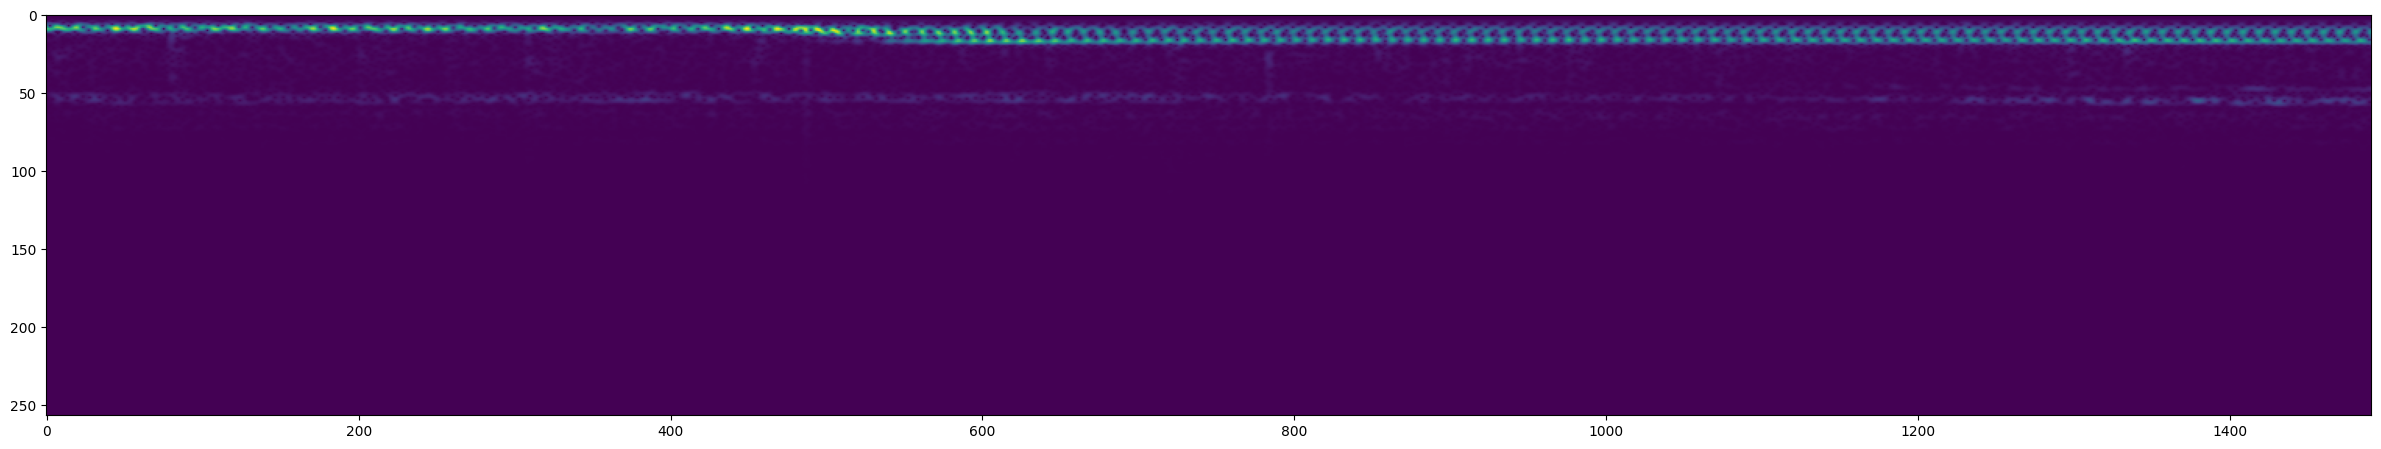

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()
#

#6. Create Training and Testing Partions
##6.1 Create a Tensorflow Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

6.2 Split into training and testing partition

In [ ]:
len(data)*.7

32.9

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

6.3 Test One Batch

In [ ]:
samples, lables = train.as_numpy_iterator().next()

In [ ]:
samples.shape

(16, 1491, 257, 1)

**7.Build deep learning model**

7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(1491,257,1)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall','Precision'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1489, 255, 16)  │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 744, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 742, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 371, 62, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 369, 60, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 184, 30, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,521 (107.50 KB)

 Trainable params: 27,521 (107.50 KB)

 Non-trainable params: 0 (0.00 B)

7.3 Fit Model, View Loss and KPI Plots

In [ ]:
for x, y in train.take(1):
    print(x.shape)

(16, 1491, 257, 1)


In [ ]:
for x, y in train.take(1):
    print(y.shape, y.dtype)
    print(tf.reduce_min(y), tf.reduce_max(y))

(16,) <dtype: 'float32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
for x, y in train.take(1):
    print("X shape:", x.shape)
    print("Y shape:", y.shape)

X shape: (16, 1491, 257, 1)
Y shape: (16,)


In [ ]:
hist = model.fit(train,epochs=4,validation_data=test)

Epoch 1/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 227s 6s/step - Precision: 0.2000 - Recall: 0.0896 - loss: 0.6731 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.6412
Epoch 2/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.6280 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.5285
Epoch 3/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 233s 7s/step - Precision: 0.3784 - Recall: 0.0121 - loss: 0.5549 - val_Precision: 0.8000 - val_Recall: 0.1860 - val_loss: 0.4744
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - Precision: 0.7626 - Recall: 0.2987 - loss: 0.4694 - val_Precision: 0.8696 - val_Recall: 0.4255 - val_loss: 0.3886


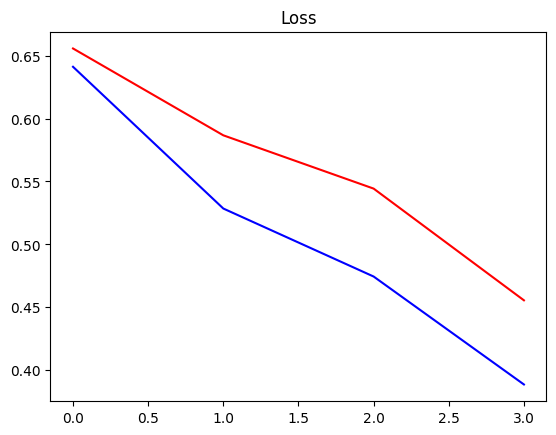

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.show()
#

In [ ]:
hist.history

{'Precision': [0.20000000298023224, 0.0, 1.0, 0.7820512652397156],
 'Recall': [0.018292682245373726, 0.0, 0.0602409653365612, 0.363095223903656],
 'loss': [0.6557586193084717,
  0.5867052674293518,
  0.5443363189697266,
  0.4555031359195709],
 'val_Precision': [0.0, 0.0, 0.800000011920929, 0.8695651888847351],
 'val_Recall': [0.0, 0.0, 0.1860465109348297, 0.42553192377090454],
 'val_loss': [0.6411926746368408,
  0.5284842848777771,
  0.47441890835762024,
  0.3885829448699951]}

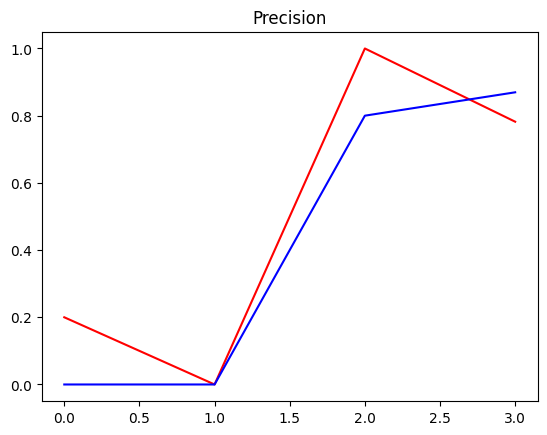

In [ ]:
plt.title('Precision')
plt.plot(hist.history['Precision'],'r')
plt.plot(hist.history['val_Precision'],'b')
plt.show()

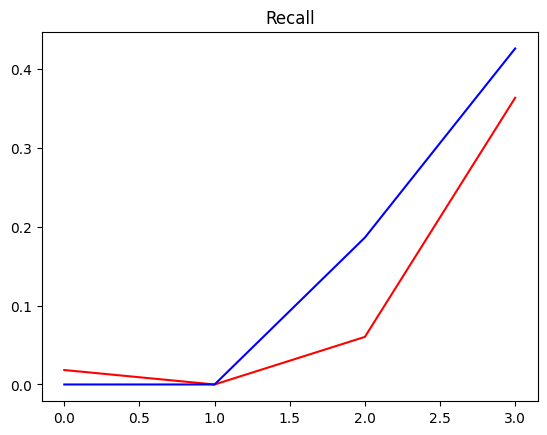

In [ ]:
plt.title('Recall')
plt.plot(hist.history['Recall'],'r')
plt.plot(hist.history['val_Recall'],'b')
plt.show()

# 8.Make a Predition on a Single Clip
8.1 Get one batch and make a Prediction


In [ ]:
x_test, y_test = test.as_numpy_iterator().next()

In [ ]:
x_test.shape

(16, 1491, 257, 1)

In [ ]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


8.2 Convert Logits to Classes

In [ ]:
yhat = [1 if predition > 0.5 else 0 for predition in yhat]
# yhat = [] for predition in yhat if predition > 0.5 yhat.append(1) else 0


In [ ]:
yhat

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
y_test.astype(int)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

## 9. Build Forest Parsing Functions
9.1 Load up MP3s

In [ ]:
import librosa

In [ ]:
def load_mp3_16k_mono(filename):
  wav, sr = librosa.load(filename, sr=16000, mono=True)
  return tf.convert_to_tensor(wav, dtype=tf.float32)

In [ ]:
mp3 = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Forest Recordings','recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(
    data=wav,
    targets=wav,
    sequence_length=48000,
    sequence_stride=48000,
    batch_size=1
)

In [ ]:
samples,index = next(audio_slices.as_numpy_iterator())

In [ ]:
len(audio_slices)

60

In [ ]:
samples.shape

(1, 48000)

9.2 Build Fuction to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample,index):
  sample = sample[0]
  padding = 48000 - tf.shape(sample)[0]
  zero_padding = tf.zeros([padding],dtype=tf.float32)

  wav = tf.concat([sample,zero_padding],axis=0)

  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram

9.3 Convert LongerClips into Windowed Spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 10s/step


In [ ]:
len(yhat)

180

In [ ]:
yhat

[0]

9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

np.int32(0)

In [ ]:
calls = tf.math.reduce_sum(yhat).numpy()

10. Make Direction

10.1 Loop over all recordings and make direction

In [ ]:
result = {}
for file in os.listdir(os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Forest Recordings')):
  FILEPATH = os.path.join('/content/drive/MyDrive','Colab Notebooks','Audio Classifier','data','Forest Recordings',file)
  wav = load_mp3_16k_mono(FILEPATH)
  audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000,sequence_stride=48000,batch_size=1)
  audio_slices = audio_slices.map(preprocess_mp3)
  audio_slices = audio_slices.batch(64)
  yhat = model.predict(audio_slices)
  result[file] = yhat

In [ ]:
result

10.2 Convert Preditions into Classes

In [ ]:
class_preds = {}
for file, logits in result.items():
  class_preds[file] = [1 if predition > 0.99 else 0 for predition in logits]
class_preds

10.3 Group Consecutive Detections

In [ ]:
postprocessed = []
for file, scores in class_preds.items():
  postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])